# <center>Análisis de series temporales en Python: una guía completa con ejemplos

 **by Selva Prabhakaran** 

## Contenido

1. ¿Qué es una serie temporal?
2. ¿Cómo importar series temporales en Python?
3. ¿Qué son los datos del panel?
4. Visualización de una serie temporal
5. Patrones en una serie de tiempo
6. Series temporales aditivas y multiplicativas
7. ¿Cómo descomponer una serie temporal en sus componentes?
8. Series temporales estacionarias y no estacionarias
9. ¿Cómo hacer estacionaria una Serie Temporal?
10. ¿Cómo probar la estacionariedad?
11. ¿Cuál es la diferencia entre el ruido blanco y una serie estacionaria?
12. ¿Cómo eliminar la tendencia de una serie temporal?
13. ¿Cómo desestacionalizar una Serie Temporal?
14. ¿Cómo probar la estacionalidad de una serie temporal?
15. ¿Cómo tratar los valores faltantes en una serie temporal?
16. ¿Qué son las funciones de autocorrelación y autocorrelación parcial?
17. ¿Cómo calcular la función de autocorrelación parcial?
18. Gráficos de retraso
19. ¿Cómo estimar la predictibilidad de una Serie Temporal?
20. ¿Por qué y cómo suavizar una serie temporal?
21. ¿Cómo usar la prueba de causalidad de Granger para saber si una serie temporal es útil para pronosticar otra?
22. Qué sigue

## 1. ¿Qué es una serie temporal?

La serie temporal es una secuencia de observaciones registradas a intervalos de tiempo regulares.

Dependiendo de la frecuencia de las observaciones, una serie de tiempo normalmente puede ser horaria, diaria, semanal, mensual, trimestral y anual. A veces, también puede tener series temporales de segundos y minutos, como la cantidad de clics y visitas de usuarios cada minuto, etc.

**¿Por qué incluso analizar una serie de tiempo?**

Porque es el paso preparatorio antes de desarrollar un pronóstico de la serie.

La serie temporal es una secuencia de observaciones registradas a intervalos de tiempo regulares. Esta guía lo guía a través del proceso de análisis de las características de una serie de tiempo dada en python.
Análisis de series temporales en Python: una guía completa. Foto de Daniel Ferrándiz.

as acciones, etc., son esencialmente datos de series temporales.Entonces, ¿qué implica analizar una serie de tiempo?

El análisis de series de tiempo implica comprender varios aspectos sobre la naturaleza inherente de la serie para que esté mejor informado para crear pronósticos significativos y precisos.

## 2. ¿Cómo importar series temporales en python?
Entonces, ¿cómo importar datos de series temporales?

Los datos de una serie temporal normalmente se almacenan en archivos u otros formatos de hojas de cálculo y contienen dos columnas: la fecha y el valor medido..csv

Usemos el paquete in pandas para leer el conjunto de datos de la serie temporal (un archivo csv en Australian Drug Sales) como un marco de datos pandas. Agregar el argumento hará que la columna de fecha se analice como un campo de fecha.read_csv()parse_dates=['date']

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Alternativamente, puede importarlo como una serie de pandas con la fecha como índice. Solo necesita especificar el index_colargumento en el para hacer esto.pd.read_csv()

In [2]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## 3. ¿Qué son los datos de panel?
Los datos del panel también son un conjunto de datos basado en el tiempo.

La diferencia es que, además de series de tiempo, también contiene una o más variables relacionadas que se miden para los mismos períodos de tiempo.

Por lo general, las columnas presentes en los datos de panel contienen variables explicativas que pueden ser útiles para predecir el Y, siempre que esas columnas estén disponibles en el período de pronóstico futuro.

A continuación se muestra un ejemplo de datos de panel.

In [3]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


# 4. Visualización de una serie de tiempo
Usemos matplotlib para visualizar la serie.

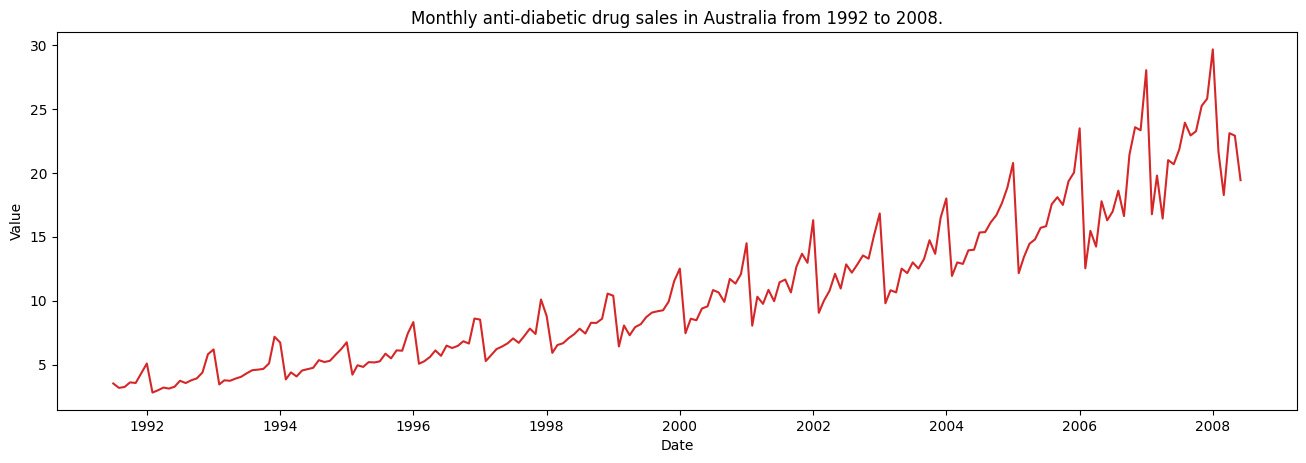

In [4]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  


Dado que todos los valores son positivos, puede mostrar esto en ambos lados del eje Y para enfatizar el crecimiento.

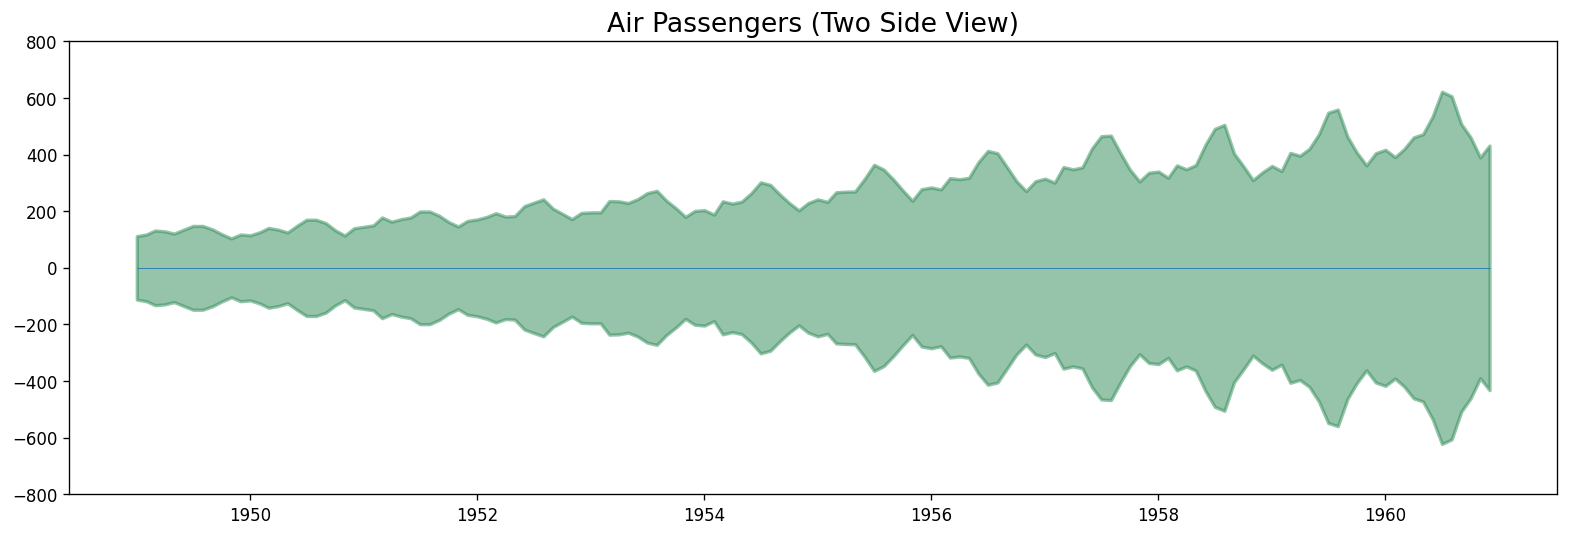

In [5]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets//master/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

Dado que es una serie de tiempo mensual y sigue un cierto patrón repetitivo cada año, puede trazar cada año como una línea separada en el mismo gráfico. Esto le permite comparar los patrones sabios del año uno al lado del otro.

**Gráfico estacional de una serie temporal**

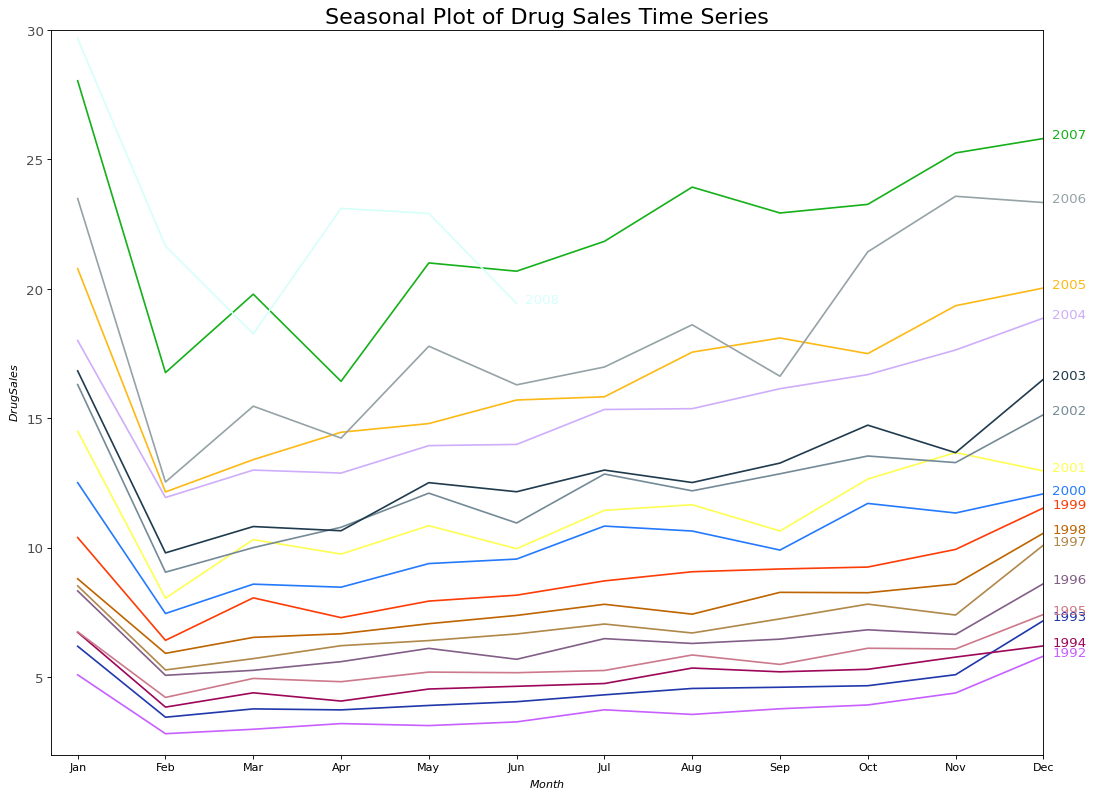

In [6]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Hay una fuerte caída en las ventas de drogas cada febrero, aumentando nuevamente en marzo, cayendo nuevamente en abril y así sucesivamente. Claramente, el patrón se repite dentro de un año determinado, todos los años.

Sin embargo, a medida que pasan los años, las ventas de medicamentos aumentan en general. Puede visualizar muy bien esta tendencia y cómo varía cada año en un buen diagrama de caja anual. Del mismo modo, puede hacer un diagrama de caja mensual para visualizar las distribuciones mensuales.

Diagrama de caja de distribución mensual (estacional) y anual (tendencia)

Puede agrupar los datos a intervalos estacionales y ver cómo se distribuyen los valores dentro de un año o mes determinado y cómo se comparan a lo largo del tiempo.

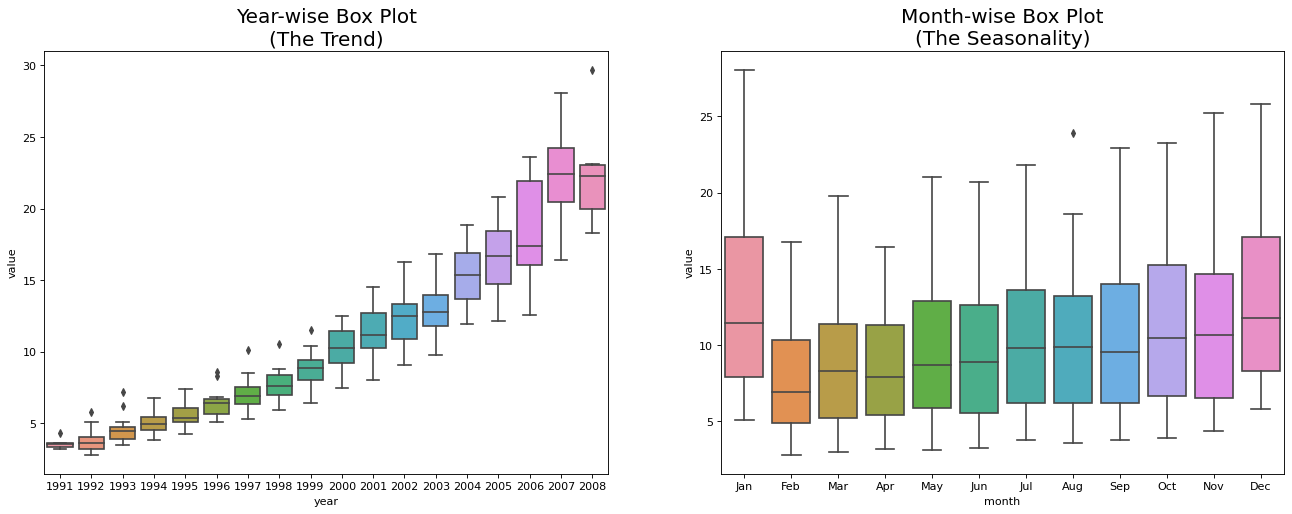

In [7]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Los diagramas de caja hacen evidentes las distribuciones anuales y mensuales. Además, en un diagrama de caja mensual, los meses de diciembre y enero claramente tienen mayores ventas de medicamentos, lo que se puede atribuir a la temporada de descuentos por vacaciones.

Hasta ahora, hemos visto las similitudes para identificar el patrón. Ahora bien, ¿cómo descubrir cualquier desviación del patrón habitual?

## 5. Patrones en una serie de tiempo
Cualquier serie temporal puede dividirse en los siguientes componentes:

 $$Nivel \ base + Tendencia + Estacionalidad + Error$$

Se observa una tendencia cuando se observa una pendiente creciente o decreciente en la serie de tiempo. Mientras que la estacionalidad se observa cuando se observa un patrón repetido distinto entre intervalos regulares debido a factores estacionales. Podría ser por el mes del año, el día del mes, los días de semana o incluso la hora del día.

Sin embargo, no es obligatorio que todas las series temporales tengan tendencia y/o estacionalidad. Una serie de tiempo puede no tener una tendencia definida pero sí una estacionalidad. Lo contrario también puede ser cierto.

Por lo tanto, una serie de tiempo se puede imaginar como una combinación de la tendencia, la estacionalidad y los términos de error.

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

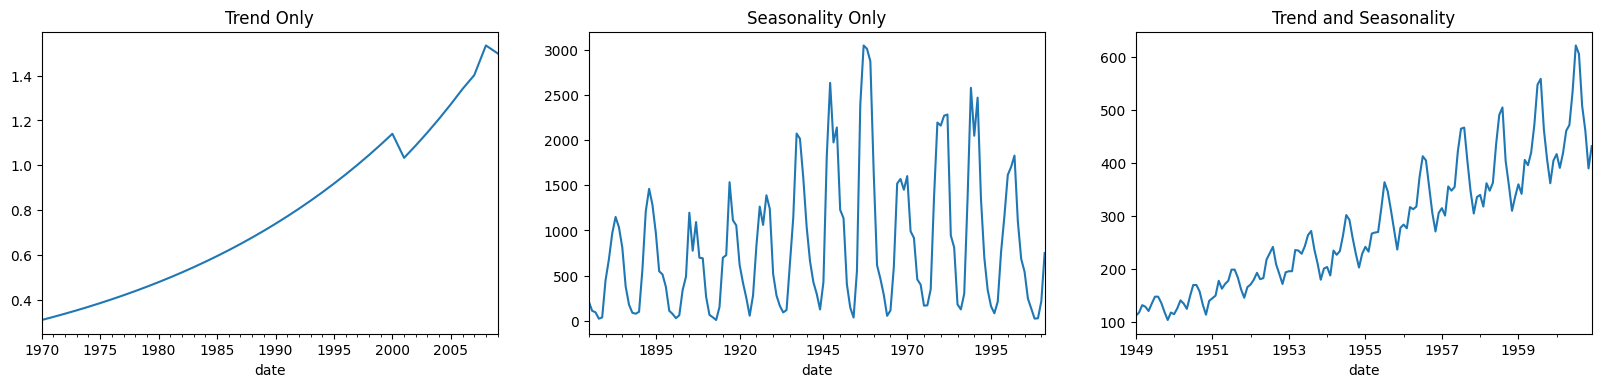

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv',
             parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv',
             parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv',
             parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Otro aspecto a considerar es el comportamiento cíclico . Ocurre cuando el patrón de subida y bajada de la serie no ocurre en intervalos fijos basados ​​en el calendario. Se debe tener cuidado de no confundir el efecto 'cíclico' con el efecto 'estacional'.

**Entonces, ¿cómo diferenciar entre un patrón 'cíclico' y 'estacional'?**

Si los patrones no son de frecuencias fijas basadas en el calendario, entonces es cíclico. Porque, a diferencia de la estacionalidad, los efectos cíclicos suelen estar influenciados por el negocio y otros factores socioeconómicos.

## 6. Series temporales aditivas y multiplicativas
Según la naturaleza de la tendencia y la estacionalidad, una serie de tiempo se puede modelar como aditiva o multiplicativa, donde cada observación de la serie se puede expresar como una suma o un producto de los componentes:

* **Serie temporal aditiva:**
$$Valor = Nivel \ Base + Tendencia + Estacionalidad + Error$$

* **Serie temporal multiplicativa:**
$$valor = nivel \ base \times tendencia \times estacionalidad x error$$

## 7. ¿Cómo descomponer una serie temporal en sus componentes?
Puede realizar una descomposición clásica de una serie temporal considerando la serie como una combinación aditiva o multiplicativa del nivel base, la tendencia, el índice estacional y el residual.

El ```seasonal_decompose``` implementa ```statsmodels ``` esto convenientemente.

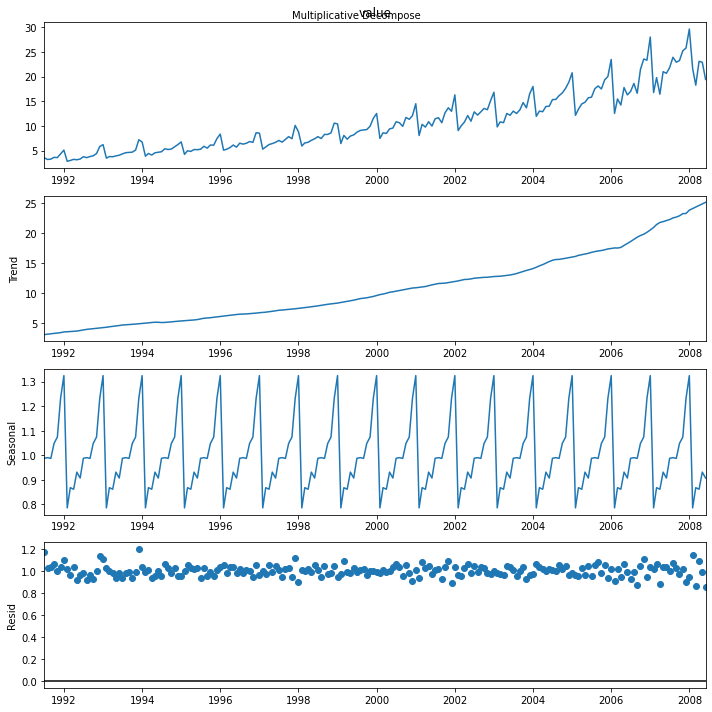

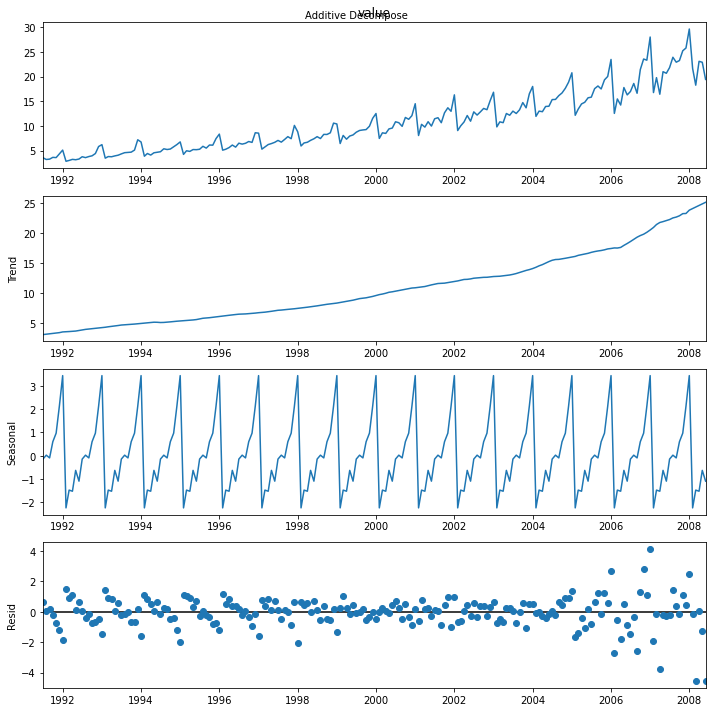

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

La configuración se ocupa de los valores que faltan en la tendencia y los residuos al comienzo de la serie.extrapolate_trend='freq'

Si observa detenidamente los residuos de la descomposición aditiva, tiene un patrón sobrante. La descomposición multiplicativa, sin embargo, parece bastante aleatoria, lo cual es bueno. Entonces, idealmente, se debería preferir la descomposición multiplicativa para esta serie en particular.

La salida numérica de los componentes de tendencia, estacional y residual se almacena en la result_mulsalida misma. Vamos a extraerlos y ponerlos en un marco de datos.

In [10]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


Si marca, el producto de las columnas ```seas``` y debe ```trend``` ser ```resid``` exactamente igual a ```actual_values.```

## 8. Series temporales estacionarias y no estacionarias
La estacionariedad es una propiedad de una serie de tiempo. Una serie estacionaria es aquella en la que los valores de la serie no son una función del tiempo.

Es decir, las propiedades estadísticas de la serie como media, varianza y autocorrelación son constantes en el tiempo. La autocorrelación de la serie no es más que la correlación de la serie con sus valores anteriores, más sobre esto a continuación.
Una serie temporal estacionaria también carece de efectos estacionales.

Entonces, ¿cómo identificar si una serie es estacionaria o no? Pongamos algunos ejemplos para que quede claro:

<img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-1024x674.png" alt="Imagen">

La imagen de arriba proviene de R's TSTutorial.

Entonces, ¿por qué importa una serie estacionaria? ¿Por qué estoy hablando de eso?

Llegaré a eso en un momento, pero comprenda que es posible hacer que casi cualquier serie de tiempo sea estacionaria aplicando una transformación adecuada. La mayoría de los métodos de pronóstico estadístico están diseñados para trabajar en una serie de tiempo estacionaria. El primer paso en el proceso de pronóstico suele ser hacer alguna transformación para convertir una serie no estacionaria en estacionaria.
## 9. ¿Cómo hacer estacionaria una serie de tiempo?
Puede hacer que la serie sea estacionaria:

1. Diferenciando la Serie (una o más)
2. Toma el registro de la serie.
3. Saca la raíz enésima de la serie
4. Combinación de lo anterior

El método más común y conveniente para estacionarizar la serie es diferenciar la serie al menos una vez hasta que se vuelva aproximadamente estacionaria.

Entonces, ¿qué es diferenciar?

Si Y_tes el valor en el tiempo 't', entonces la primera diferencia de Y = Y t – Y t-1. En términos más simples, diferenciar la serie no es más que restar el siguiente valor por el valor actual.
Si la primera diferencia no hace que una serie sea estacionaria, puede optar por la segunda diferenciación. Etcétera.

Por ejemplo, considere la siguiente serie: [1, 5, 2, 12, 20]

La primera diferencia da: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

La segunda diferencia da: [-3-4, -10-3, 8-10] = [-7, -13, -2]

## 10. ¿Por qué hacer estacionaria una serie no estacionaria antes de pronosticar?

Pronosticar una serie estacionaria es relativamente fácil y los pronósticos son más confiables.

Una razón importante es que los modelos de pronóstico autorregresivos son esencialmente modelos de regresión lineal que utilizan los retrasos de la serie en sí como predictores.

Sabemos que la regresión lineal funciona mejor si los predictores (X variables) no están correlacionados entre sí. Por lo tanto, estacionarizar la serie resuelve este problema ya que elimina cualquier autocorrelación persistente, lo que hace que los predictores (retrasos de la serie) en los modelos de pronóstico sean casi independientes.

Ahora que hemos establecido que la estacionariedad de la serie es importante, ¿cómo se verifica si una serie dada es estacionaria o no?

## 11. ¿Cómo probar la estacionariedad?
La estacionariedad de una serie se puede establecer observando la trama de la serie como hicimos antes.

Otro método es dividir la serie en 2 o más partes contiguas y calcular las estadísticas de resumen como la media, la varianza y la autocorrelación. Si las estadísticas son bastante diferentes, es poco probable que la serie sea estacionaria.

Sin embargo, necesita un método para determinar cuantitativamente si una serie dada es estacionaria o no. Esto se puede hacer usando pruebas estadísticas llamadas 'Pruebas de Raíz Unitaria'. Hay múltiples variaciones de esto, donde las pruebas verifican si una serie de tiempo no es estacionaria y posee una raíz unitaria.

Existen múltiples implementaciones de pruebas de raíz unitaria como:

1. Prueba Dickey Fuller aumentada (prueba ADH)
2. Kwiatkowski-Phillips-Schmidt-Shin – Prueba KPSS (tendencia estacionaria)
3. Prueba de Philips Perron (Prueba PP)

La más utilizada es la prueba ADF, donde la hipótesis nula es que la serie de tiempo posee raíz unitaria y no es estacionaria. Entonces, si el valor P en la prueba ADH es menor que el nivel de significación (0.05), rechaza la hipótesis nula.

La prueba KPSS, por otro lado, se utiliza para probar la estacionariedad de la tendencia. La hipótesis nula y la interpretación del valor P es justo lo contrario de la prueba ADH. El siguiente código implementa estas dos pruebas usando ```statsmodelsel``` paquete en python.







In [11]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930675
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## 12. ¿Cuál es la diferencia entre el ruido blanco y una serie estacionaria?
Al igual que una serie estacionaria, el ruido blanco tampoco es una función del tiempo, es decir, su media y la varianza no cambia con el tiempo. Pero la diferencia es que el ruido blanco es completamente aleatorio con una media de 0.

En el ruido blanco no hay patrón alguno. Si considera las señales de sonido en una radio FM como una serie de tiempo, el sonido en blanco que escucha entre los canales es ruido blanco.

Matemáticamente, una secuencia de números completamente aleatorios con media cero es un ruido blanco.

<AxesSubplot:title={'center':'Random White Noise'}>

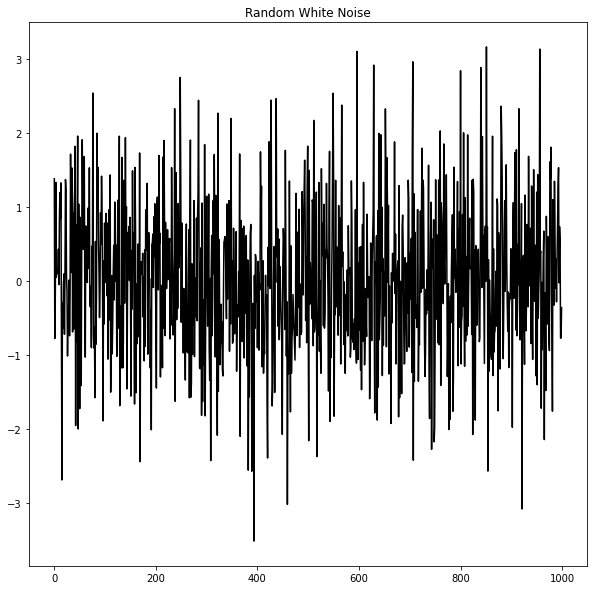

In [12]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

## 13. ¿Cómo eliminar la tendencia de una serie temporal?
Eliminar la tendencia de una serie temporal consiste en eliminar el componente de tendencia de una serie temporal. Pero, ¿cómo extraer la tendencia? Hay múltiples enfoques.

1. Reste la línea de mejor ajuste de la serie de tiempo. La línea de mejor ajuste se puede obtener a partir de un modelo de regresión lineal con los pasos de tiempo como predictor. Para tendencias más complejas, es posible que desee utilizar términos cuadráticos (x^2) en el modelo.

2. Reste el componente de tendencia obtenido de la descomposición de series de tiempo que vimos anteriormente.

3. Restar la media

4. Aplique un filtro como el filtro Baxter-King ( filtro statsmodels.tsa.filters.bk) o el filtro Hodrick-Prescott ( filtro statsmodels.tsa.filters.hp) para eliminar las líneas de tendencia del promedio móvil o los componentes cíclicos.

Implementemos los dos primeros métodos.

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

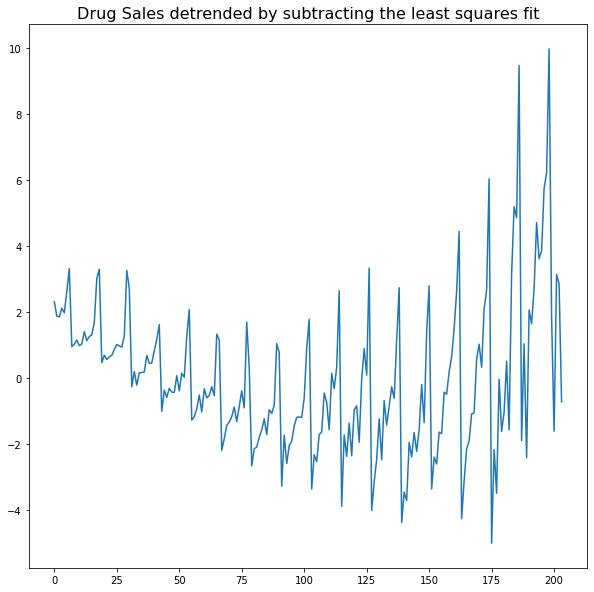

In [13]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

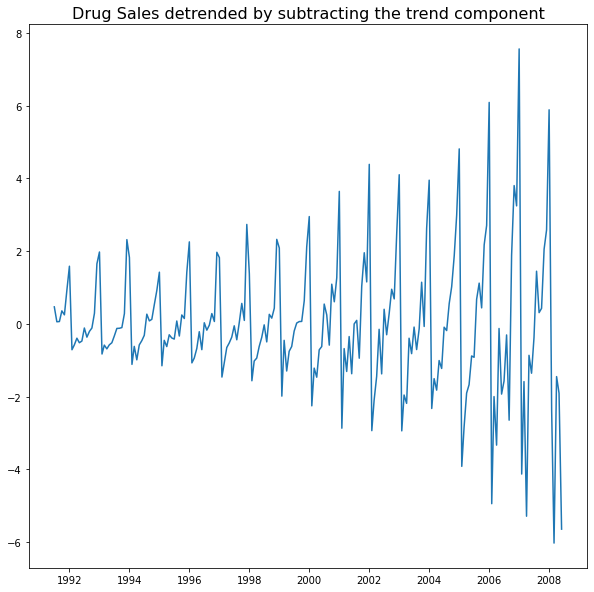

In [14]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

# 14. ¿Cómo desestacionalizar una serie temporal?
También existen múltiples enfoques para desestacionalizar una serie temporal. A continuación se muestran algunos:

- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

- 2. Seasonal difference the series (subtract the value of previous season from the current value)

- 3. Divide the series by the seasonal index obtained from STL decomposition

Si dividir por el índice estacional no funciona bien, intente tomar un registro de la serie y luego desestacionalice. Más tarde puede restaurar a la escala original tomando un exponencial.

[]

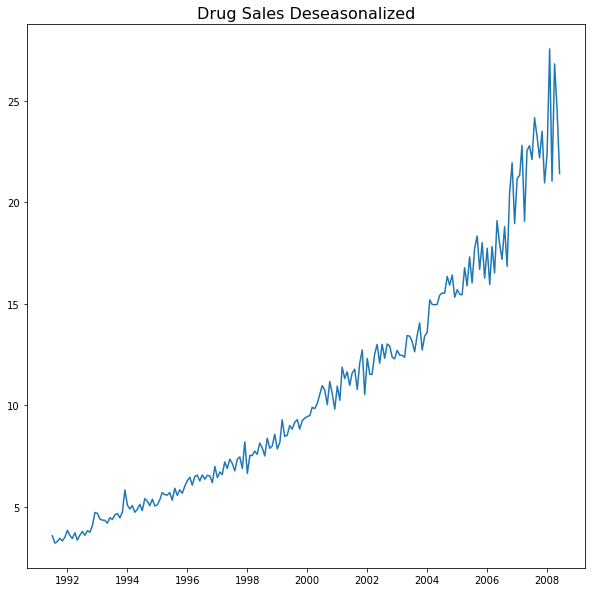

In [15]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## 15. ¿Cómo probar la estacionalidad de una serie de tiempo?
La forma común es trazar la serie y buscar patrones repetibles en intervalos de tiempo fijos. Entonces, los tipos de estacionalidad están determinados por el reloj o el calendario:

Hora del día
Dia del mes
Semanalmente
Mensual
Anual
Sin embargo, si desea una inspección más definitiva de la estacionalidad, utilice el gráfico de función de autocorrelación (ACF). Más sobre el ACF en las próximas secciones. Pero cuando hay un patrón estacional fuerte, el gráfico ACF generalmente revela picos repetidos definitivos en los múltiplos de la ventana estacional.

Por ejemplo, la serie temporal de ventas de medicamentos es una serie mensual con patrones que se repiten cada año. Por lo tanto, puede ver picos en las líneas 12, 24, 36..

Debo advertirle que en los conjuntos de datos de palabras reales, estos patrones fuertes apenas se notan y pueden distorsionarse con cualquier ruido, por lo que necesita un ojo cuidadoso para capturar estos patrones.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

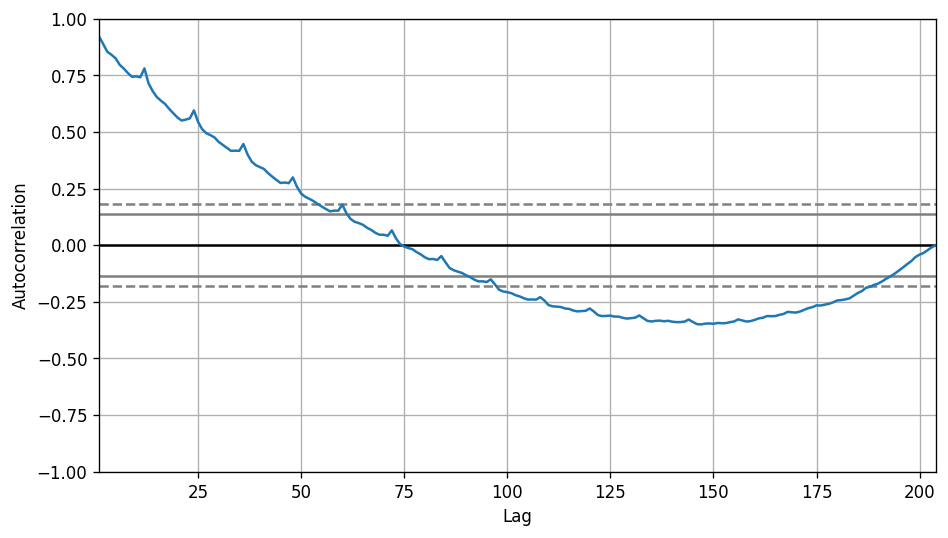

In [16]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

Alternativamente, si desea una prueba estadística, CHTest puede determinar si se requiere diferenciación estacional para estacionarizar la serie.

## 16. ¿Cómo tratar los valores perdidos en una serie de tiempo?
A veces, a su serie temporal le faltarán fechas/horas. Eso significa que los datos no fueron capturados o no estaban disponibles para esos períodos. Podría suceder que la medición fuera cero en esos días, en cuyo caso, puede completar esos períodos con cero.

En segundo lugar, cuando se trata de series de tiempo, normalmente NO debe reemplazar los valores faltantes con la media de la serie, especialmente si la serie no es estacionaria. Lo que podría hacer en su lugar para una solución rápida y sucia es reenviar el valor anterior.

Sin embargo, dependiendo de la naturaleza de la serie, querrá probar varios enfoques antes de concluir. Algunas alternativas efectivas a la imputación son:

* Relleno hacia atrás
* Interpolación linear
* interpolación cuadrática
* Media de los vecinos más cercanos
* Media de contrapartes estacionales

Para medir el rendimiento de la imputación, introduzco manualmente los valores faltantes en la serie temporal, los imputo con los enfoques anteriores y luego mido el error cuadrático medio de los valores imputados frente a los valores reales.

In [17]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

HTTPError: HTTP Error 400: Bad Request

También podría considerar los siguientes enfoques dependiendo de cuán precisas desee que sean las imputaciones.

1. Si tiene variables explicativas, use un modelo de predicción como el bosque aleatorio o los k-vecinos más cercanos para predecirlo.
2. Si tiene suficientes observaciones pasadas, pronostique los valores faltantes.
3. Si tiene suficientes observaciones futuras, reproduzca los valores faltantes
4. Pronóstico de contrapartes de ciclos anteriores.

## 17. ¿Qué son las funciones de autocorrelación y autocorrelación parcial?
La autocorrelación es simplemente la correlación de una serie con sus propios retrasos. Si una serie está significativamente autocorrelacionada, eso significa que los valores anteriores de la serie (retrasos) pueden ser útiles para predecir el valor actual.

La autocorrelación parcial también transmite información similar pero transmite la correlación pura de una serie y su rezago, excluyendo las contribuciones de correlación de los rezagos intermedios.

c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


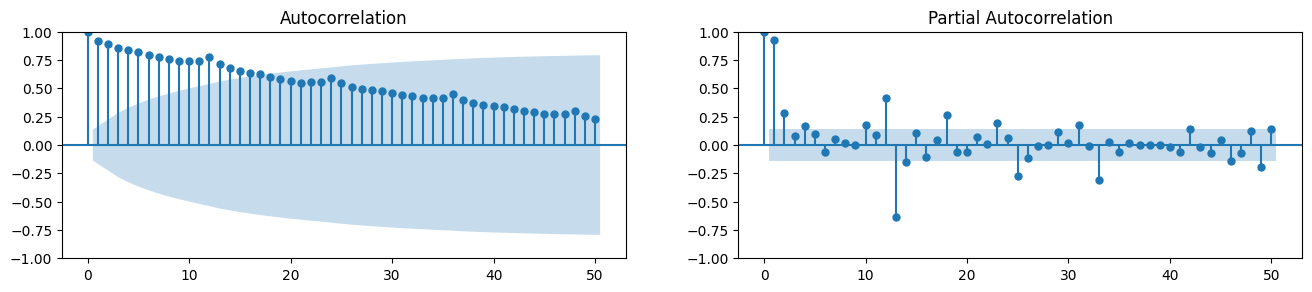

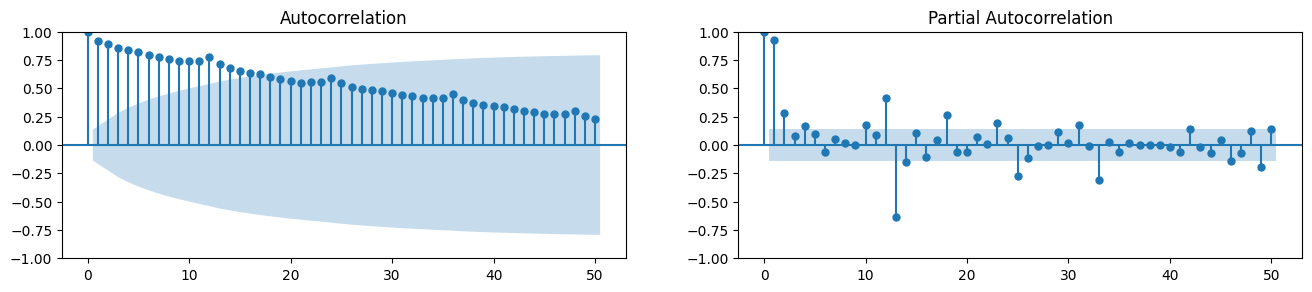

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

## 18. ¿Cómo calcular la función de autocorrelación parcial?
Entonces, ¿cómo calcular la autocorrelación parcial?

La autocorrelación parcial del retraso (k) de una serie es el coeficiente de ese retraso en la ecuación de autorregresión de Y. La ecuación autorregresiva de Y no es más que la regresión lineal de Y con sus propios retrasos como predictores.
Por ejemplo, si Y_tes la serie actual y es el rezago 1 de , entonces la autocorrelación parcial del rezago 3 ( ) es el coeficiente $\alpha_3$ de en la siguiente ecuación:Y_t-1YY_t-3Y_t-3

## 19. Gráficas de retraso
Un diagrama de retraso es un diagrama de dispersión de una serie de tiempo contra un retraso de sí mismo. Normalmente se utiliza para comprobar la autocorrelación. Si existe algún patrón en la serie como el que ves a continuación, la serie está autocorrelacionada. Si no existe tal patrón, es probable que la serie sea un ruido blanco aleatorio.

En el siguiente ejemplo sobre la serie temporal del área de las manchas solares, los gráficos se dispersan cada vez más a medida que aumenta el n_lag.

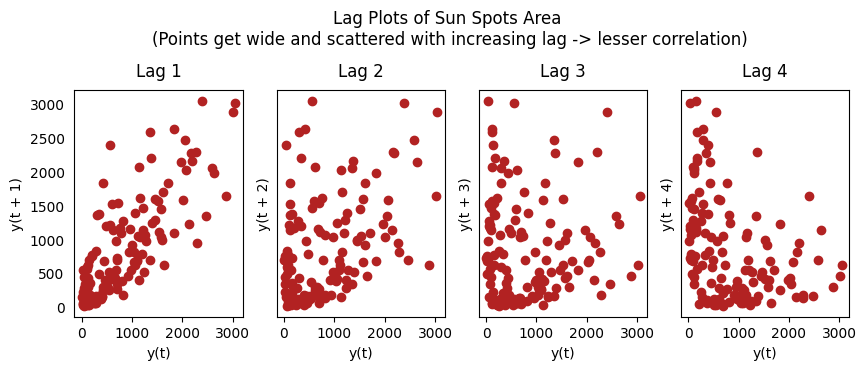

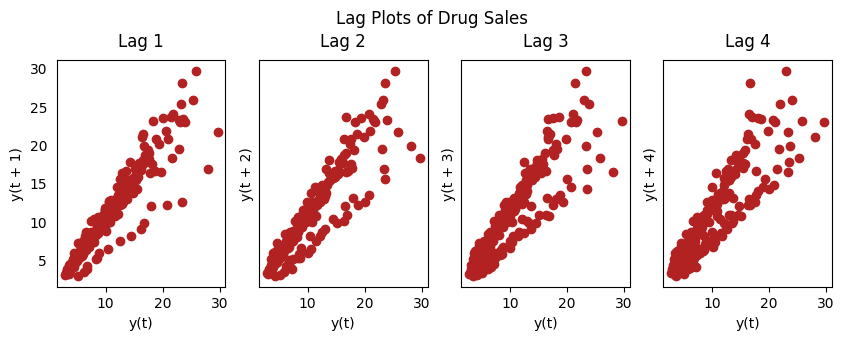

In [19]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

## 20. ¿Cómo estimar la predictibilidad de una serie temporal?
Cuantos más patrones regulares y repetibles tenga una serie de tiempo, más fácil será pronosticar. La 'Entropía aproximada' se puede utilizar para cuantificar la regularidad y la imprevisibilidad de las fluctuaciones en una serie temporal.

Cuanto mayor sea la entropía aproximada, más difícil será pronosticarla.
Otra alternativa mejor es la 'Entropía de muestra'.

La entropía de muestra es similar a la entropía aproximada, pero es más consistente al estimar la complejidad incluso para series de tiempo más pequeñas. Por ejemplo, una serie de tiempo aleatoria con menos puntos de datos puede tener una "entropía aproximada" más baja que una serie de tiempo más "regular", mientras que una serie de tiempo aleatoria más larga tendrá una "entropía aproximada" más alta.

Sample Entropy maneja este problema muy bien. Vea la demostración a continuación.

In [20]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   # 0.537
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.716

0.6514704970333534
0.5374775224973489
0.0898376940798844
0.6725953850207098


In [21]:
# https://en.wikipedia.org/wiki/Sample_entropy
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))    # 0.41
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.42

0.7853311366380039
0.41887013457621214
inf
2.2721258855093374


C:\Users\tesbh\AppData\Local\Temp\ipykernel_24636\1335144052.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


## 21. ¿Por qué y cómo suavizar una serie temporal?

El suavizado de una serie de tiempo puede ser útil en:

* Reduciendo el efecto del ruido en una señal se obtiene una buena aproximación de la serie filtrada por el ruido.
* La versión suavizada de la serie se puede usar como una función para explicar la serie original en sí.
* Visualice mejor la tendencia subyacente

Entonces, ¿cómo suavizar una serie? Analicemos los siguientes métodos:

1. Tome un promedio móvil
2. Hacer un suavizado LOESS (regresión localizada)
3. Realice un suavizado LOWESS (regresión ponderada localmente)

El promedio móvil no es más que el promedio de una ventana móvil de ancho definido. Pero debe elegir el ancho de la ventana sabiamente, porque un tamaño de ventana grande suavizará demasiado la serie. Por ejemplo, un tamaño de ventana igual a la duración estacional (por ejemplo, 12 para una serie mensual) anulará efectivamente el efecto estacional.

LOESS, abreviatura de 'regresión LOcalizada', ajusta regresiones múltiples en la vecindad local de cada punto. Se implementa en el statsmodelspaquete, donde puede controlar el grado de suavizado mediante fracun argumento que especifica el porcentaje de puntos de datos cercanos que deben considerarse para ajustarse a un modelo de regresión.

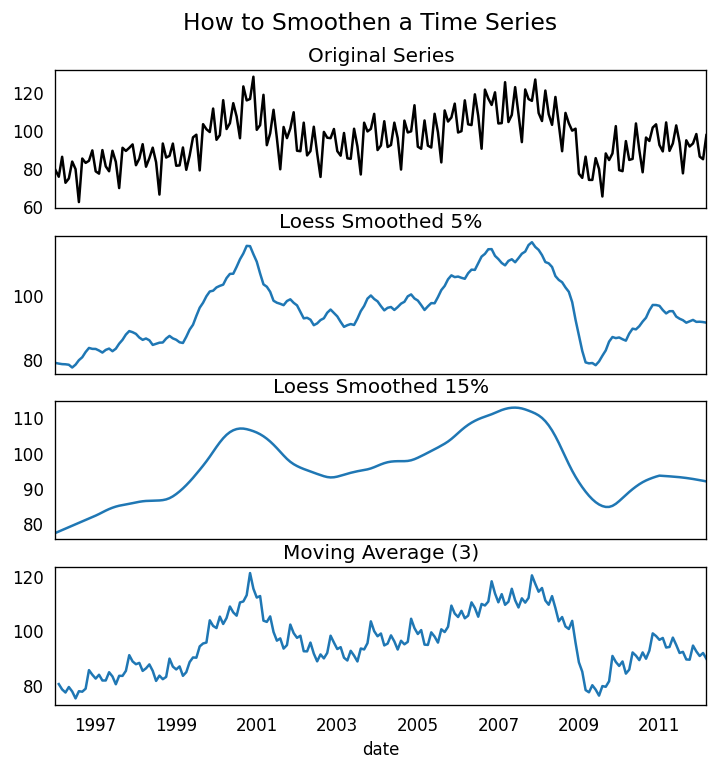

In [22]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('master_elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## ¿Cómo usar la prueba de causalidad de Granger para saber si una serie de tiempo es útil para pronosticar otra?

La prueba de causalidad de Granger se usa para determinar si una serie de tiempo será útil para pronosticar otra.

¿Cómo funciona la prueba de causalidad de Granger?

Se basa en la idea de que si X causa Y, entonces el pronóstico de Y basado en valores previos de Y Y los valores previos de X deberían superar el pronóstico de Y basado solo en valores previos de Y.

Por lo tanto, comprenda que la causalidad de Granger no debe usarse para probar si un retraso de Y causa Y. En cambio, generalmente se usa solo en variables exógenas (no retraso Y).

Está muy bien implementado en el paquete statsmodel.

Acepta una matriz 2D con 2 columnas como argumento principal. Los valores están en la primera columna y el predictor (X) está en la segunda columna.

La hipótesis Nula es: la serie de la segunda columna, Granger no causa la serie de la primera. Si los valores P son inferiores a un nivel de significación (0,05), entonces rechaza la hipótesis nula y concluye que dicho retraso de X es realmente útil.

El segundo argumento maxlagdice hasta cuántos rezagos de Y deben incluirse en la prueba.

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.601369958107206, 8.876175235021478e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557365, 3.661425871352998e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987324, 1.9133235086856426e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227357, 3.5267600881278635e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.69891799873247, 1.9133235086856426e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

En el caso anterior, los valores P son cero para todas las pruebas. Entonces, el 'mes' puede usarse para pronosticar los Pasajeros Aéreos.

## 22. ¿Qué sigue?
Eso es todo por ahora. Empezamos desde lo más básico y comprendimos varias características de una serie temporal. Una vez realizado el análisis, el siguiente paso es comenzar a pronosticar.

En la próxima publicación, lo guiaré a través del proceso detallado de creación de modelos de pronóstico de series temporales utilizando ARIMA. Nos vemos pronto.